In [153]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [195]:
def calculate_azimuth(pixel_coords, antenna_pos, main_lobe_azimuth):

    """
    Calculate the azimuth angle of each pixel relative to the antenna's main lobe direction.

    Parameters:
        pixel_coords (numpy array): Array of shape (H, W, 2) containing the coordinates of each pixel.
        antenna_pos (tuple): (x0, y0) Position of the antenna in the image.
        main_lobe_azimuth (float): Azimuth angle of the antenna's main lobe in radians.

    Returns:
        numpy array: Array of azimuth angles in degrees for each pixel.
    """
    # Calculate the direction vectors from each pixel to the antenna
    dx = pixel_coords[..., 0] - antenna_pos[0]  # x-coordinate difference
    dy = pixel_coords[..., 1] - antenna_pos[1]  # y-coordinate difference

    # Stack the differences into a 2D array representing vectors
    pixel_vectors = np.stack((dx, dy), axis=-1).astype(float)

    # Convert the azimuth angle to a direction vector (lobe direction)
    lobe_vector = np.array([np.cos(main_lobe_azimuth), np.sin(main_lobe_azimuth)], dtype=float)

    # Normalize the lobe direction vector to unit length
    lobe_vector /= np.linalg.norm(lobe_vector)

    # Calculate magnitudes of pixel vectors
    pixel_magnitudes = np.linalg.norm(pixel_vectors, axis=-1, keepdims=True)

    # Avoid division by zero by setting zero magnitudes to a small value
    pixel_magnitudes = np.where(pixel_magnitudes == 0, 1e-10, pixel_magnitudes)

    # Normalize pixel vectors to unit length
    pixel_vectors /= pixel_magnitudes

    # Compute the dot product between each pixel vector and the normalized lobe vector
    dot_product = np.clip(np.sum(pixel_vectors * lobe_vector, axis=-1), -1.0, 1.0)

    # Calculate azimuth angles in degrees from the dot product
    azimuth_angles = np.degrees(np.arccos(dot_product))

    return azimuth_angles

def create_color_image(azimuth_angles, colormap='viridis'):
    """
    Create a color image based on azimuth angles using a specified colormap.

    Parameters:
        azimuth_angles (numpy array): Array of azimuth angles in degrees.
        colormap (str): Name of the colormap to use (e.g., 'viridis', 'plasma').

    Returns:
        numpy array: Color image based on azimuth angles.
    """
    # Normalize azimuth angles to the range [0, 1]
    normalized_azimuth = (azimuth_angles - azimuth_angles.min()) / (azimuth_angles.max() - azimuth_angles.min())
    #normalized_azimuth = azimuth_angles/np.pi
    # Get the colormap function
    colormap_func = cm.get_cmap(colormap)

    # Apply the colormap to the normalized azimuth angles
    color_image = colormap_func(normalized_azimuth)[:, :, :3]  # Use only RGB channels, ignore alpha
    print('color image shape: ' , color_image.shape)

    # Convert the color image to 8-bit per channel (0-255) format
    return (color_image * 255).astype(np.uint8)


(300, 300)
color image shape:  (300, 300, 3)


<ipython-input-195-95682858e352>:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap_func = cm.get_cmap(colormap)


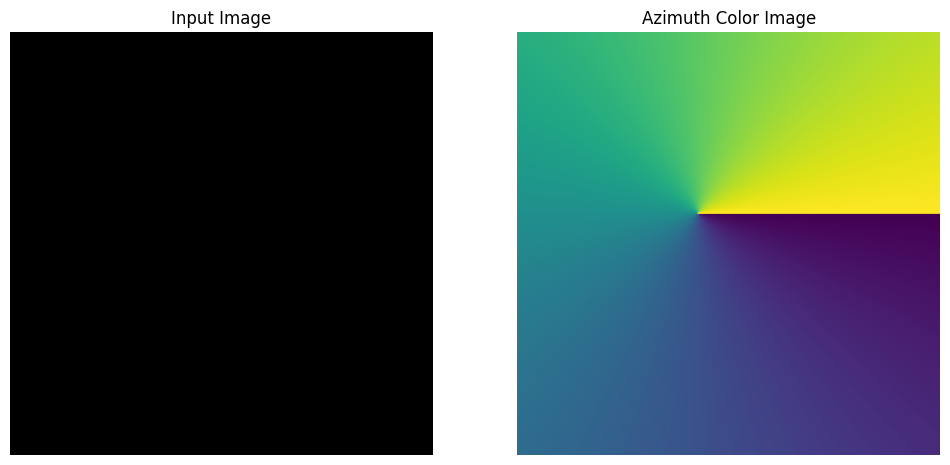

In [196]:
def main():
    # Define image dimensions
    height, width = 256, 256

    # Create a synthetic grayscale image with a constant gray value of 128
    input_image = np.full((height, width), 128, dtype=np.uint8)

    # Define the position of the antenna (center of the image)
    antenna_pos = (width // 2, height // 2)

    # Define the azimuth angle of the antenna's main lobe in radians
    #main_lobe_azimuth = np.pi / 4  # Example: 45 degrees (π/4 radians)
    main_lobe_azimuth = np.array([-1,0])

    # Create a grid of pixel coordinates
    y, x = np.indices((height, width))
    pixel_coords = np.stack((x, y), axis=-1)  # Shape (height, width, 2)

    # Calculate azimuth angles for each pixel
    azimuth_angles = calculate_azimuth_1(pixel_coords, antenna_pos, main_lobe_azimuth)
    print(azimuth_angles.shape)
    # Create a color image based on the azimuth angles
    color_image = create_color_image(azimuth_angles, colormap='viridis')

    # Display the input grayscale image and the color azimuth image side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Azimuth Color Image')
    plt.imshow(color_image)
    plt.axis('off')

    plt.show()

    # Save the color image to a file
    #plt.imsave('output_azimuth_color_image.png', color_image)

if __name__ == "__main__":
  main()

--------
[[ 2.35460184  2.35794631  2.36131315 ... -2.36629516 -2.3629058
  -2.35953896]
 [ 2.35125737  2.35460184  2.35796883 ... -2.36295114 -2.35956148
  -2.35619449]
 [ 2.34789053  2.35123485  2.35460184 ... -2.35958431 -2.35619449
  -2.3528275 ]
 ...
 [ 0.79549883  0.79215482  0.78878798 ... -0.78539816 -0.78878798
  -0.79215482]
 [ 0.79210947  0.78876515  0.78539816 ... -0.78200835 -0.78539816
  -0.78876515]
 [ 0.78874263  0.78539816  0.78203117 ... -0.77864151 -0.78203117
  -0.78539816]]


<ipython-input-154-d4e9075975f8>:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap_func = cm.get_cmap(colormap)


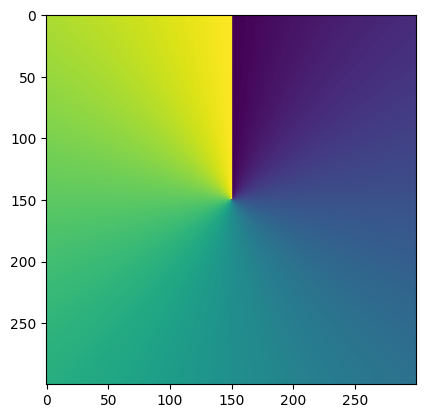

In [156]:
#arr = np.indices((10,2))
y, x = np.indices((300,300))
pixel_coords = np.stack((x, y), axis=-1)
#print(pixel_coords.shape)
#print(np.transpose(pixel_coords,axes=(1,0,2)))
#the_3edla = np.transpose(pixel_coords,axes=(1,0,2))
the_3edla = pixel_coords
pointing_vec = np.array([0,1]) #it is y first and then inverted x
pointing_vec = pointing_vec/np.linalg.norm(pointing_vec)
ant_position = [150,150]
the_vals_arr = the_3edla - ant_position
#print(the_3edla)
print('--------')
#print(the_vals_arr)
#the_3edla[0,0] = 1e-10
mags_arr = np.linalg.norm(the_vals_arr, axis=-1, keepdims=True)
mags_arr = np.where(mags_arr == 0, 1e-10, mags_arr)
normailize_arr = the_vals_arr / mags_arr
#print(normailize_arr)
#final_image_vals = np.arctan2(normailize_arr[:,:,1],normailize_arr[:,:,0])
#before_dot = np.dot(normailize_arr , pointing_vec)
angle_diff_1 = np.arctan2(normailize_arr[:,:,1],normailize_arr[:,:,0])
angle_diff_2 = np.arctan2(pointing_vec[1],pointing_vec[0])
final_diff = angle_diff_1 - angle_diff_2
final_diff = np.where(final_diff >= -3.14,final_diff , np.pi + (final_diff+3.14))
final_diff = np.where(final_diff <= 3.14,final_diff , np.pi - (final_diff-3.14))
final_image_vals = np.degrees(final_diff)
#print(final_image_vals)
print((final_diff))
color_image = create_color_image(final_image_vals, colormap='viridis')
plt.imshow(color_image)

-0.06935382755764802
[-1.66485756 -1.66544935 -1.6660486  -1.66665547 -1.6672701  -1.66789264
 -1.66852323 -1.66916205 -1.66980924 -1.67046498 -1.67112943 -1.67180277
 -1.67248518 -1.67317684 -1.67387794 -1.67458867 -1.67530923 -1.67603983
 -1.67678068 -1.677532   -1.678294   -1.67906692 -1.67985099 -1.68064645
 -1.68145355 -1.68227255 -1.68310371 -1.68394731 -1.68480362 -1.68567293
 -1.68655554 -1.68745176 -1.6883619  -1.68928629 -1.69022525 -1.69117915
 -1.69214833 -1.69313316 -1.69413403 -1.69515132 -1.69618545 -1.69723682
 -1.69830589 -1.69939308 -1.70049886 -1.70162372 -1.70276815 -1.70393265
 -1.70511777 -1.70632404 -1.70755204 -1.70880235 -1.71007559 -1.71137238
 -1.71269338 -1.71403928 -1.71541077 -1.71680858 -1.71823349 -1.71968627
 -1.72116775 -1.72267878 -1.72422025 -1.72579307 -1.7273982  -1.72903665
 -1.73070945 -1.73241768 -1.73416247 -1.735945   -1.7377665  -1.73962823
 -1.74153154 -1.74347782 -1.74546853 -1.74750518 -1.74958938 -1.75172279
 -1.75390714 -1.75614428 -1.75

<ipython-input-185-c915559ac619>:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap_func = cm.get_cmap(colormap)


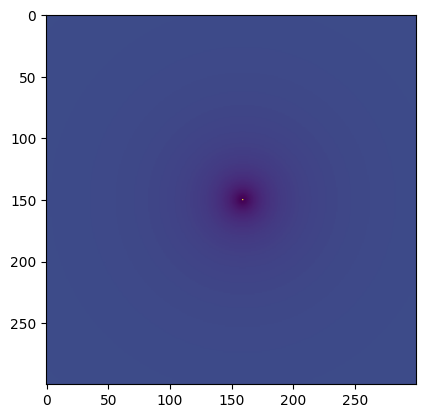

In [192]:
#here i am trying to walk throught the tilt code step by step
#arr = np.indices((10,2))
y,x = np.indices((300,300))
pixel_coords = np.stack((x, y), axis=-1)
for_azm = pixel_coords
z_element = np.zeros((300, 300, 1), dtype=pixel_coords.dtype)
pixel_coords = np.concatenate((pixel_coords, z_element), axis=-1)
#print(pixel_coords.shape)
#print(np.transpose(pixel_coords,axes=(1,0,2)))
#the_3edla = np.transpose(pixel_coords,axes=(1,0,2))
#pixel_coords[:,:,2] = 0
#print(pixel_coords[2][0])

the_3edla = pixel_coords
pointing_vec = np.array([-1,-1,0]) #it is y first and then inverted x
pointing_vec = pointing_vec/np.linalg.norm(pointing_vec)
ant_position = [159,150,15]
the_vals_arr = the_3edla - ant_position
# #print(the_3edla)
# print('--------')
#print(the_vals_arr)
# #the_3edla[0,0] = 1e-10
mags_arr = np.linalg.norm(the_vals_arr, axis=-1, keepdims=True)
mags_arr = np.where(mags_arr == 0, 1e-10, mags_arr)
normailize_arr = the_vals_arr / mags_arr

new_normalize = np.zeros((300, 300, 2), dtype=float)
new_normalize[:, :, 0] = np.sqrt(normailize_arr[:, :, 0]**2 + normailize_arr[:, :, 1]**2)  # Sum of first and second elements
#new_normalize[:, :, 0] = normailize_arr[:, :, 1]
new_normalize[:, :, 1] = normailize_arr[:, :, 2]

print(normailize_arr[2,2,2])
# #final_image_vals = np.arctan2(normailize_arr[:,:,1],normailize_arr[:,:,0])
before_dot = np.dot(normailize_arr , pointing_vec)#(np.linalg.norm(normailize_arr, axis=-1) * np.linalg.norm(pointing_vec))
mags_dot = np.linalg.norm(before_dot, axis=-1, keepdims=True)
before_dot = before_dot/mags_dot
#print(before_dot[0])
before_dot = np.arccos(before_dot)
#trying the dor product method
new_dotter = np.zeros((300, 300), dtype=float)
z_dir = np.array([0,0,1])
# for i , big_arr in enumerate(normailize_arr):
#   for j,temp_vec in enumerate(big_arr):
#     #print(temp_vec)
#     new_dotter[i,j] = angle_between(temp_vec,z_dir)
# ant_ver_angle = angle_between(pointing_vec,z_dir)
# new_dotter = new_dotter - ant_ver_angle

angle_diff_1 = np.arctan2(new_normalize[:,:,1],new_normalize[:,:,0])
angle_diff_2 = np.arctan2(np.sqrt(pointing_vec[1]**2+pointing_vec[0]**2),pointing_vec[2])
#print(np.degrees(angle_diff_2))
final_diff = angle_diff_1 - angle_diff_2
final_diff = np.where(final_diff >= -3.14,final_diff , np.pi + (final_diff+3.14))
final_diff = np.where(final_diff <= 3.14,final_diff , np.pi - (final_diff-3.14))
print(final_diff[150])
final_image_vals = np.degrees(final_diff)
#final_image_vals = final_diff
print(np.max(final_image_vals))
#print(final_image_vals)
#final_image_vals = final_image_vals * calculate_azimuth_1(for_azm, ant_position[:2], pointing_vec[:2])
#print(final_image_vals.shape)
# print((final_diff))
color_image = create_color_image(final_image_vals, colormap='viridis')
plt.imshow(color_image)

In [ ]:
def calculate_tilt(img_h,img_w,antenna_pos, antenna_direction):
  #here i am trying to walk throught the tilt code step by step
  y,x = np.indices((img_w,img_h))
  pixel_coords = np.stack((x, y), axis=-1)
  z_element = np.zeros((img_w, img_h, 1), dtype=pixel_coords.dtype)
  pixel_coords = np.concatenate((pixel_coords, z_element), axis=-1)

  pointing_vec = np.array([-1,-1,0]) #it is y first and then inverted x
  pointing_vec = pointing_vec/np.linalg.norm(pointing_vec)
  #ant_position = [159,150,15]
  the_vals_arr = pixel_coords - antenna_pos

  mags_arr = np.linalg.norm(the_vals_arr, axis=-1, keepdims=True)
  mags_arr = np.where(mags_arr == 0, 1e-10, mags_arr)
  normailize_arr = the_vals_arr / mags_arr

  new_normalize = np.zeros((img_w,img_h, 2), dtype=float)
  new_normalize[:, :, 0] = np.sqrt(normailize_arr[:, :, 0]**2 + normailize_arr[:, :, 1]**2)  # Sum of first and second elements
  #new_normalize[:, :, 0] = normailize_arr[:, :, 1]
  new_normalize[:, :, 1] = normailize_arr[:, :, 2]


  # #final_image_vals = np.arctan2(normailize_arr[:,:,1],normailize_arr[:,:,0])
  # before_dot = np.dot(normailize_arr , pointing_vec)#(np.linalg.norm(normailize_arr, axis=-1) * np.linalg.norm(pointing_vec))
  # mags_dot = np.linalg.norm(before_dot, axis=-1, keepdims=True)
  # before_dot = before_dot/mags_dot
  # #print(before_dot[0])
  # before_dot = np.arccos(before_dot)
  # #trying the dor product method
  # new_dotter = np.zeros((300, 300), dtype=float)
  # z_dir = np.array([0,0,1])
  # # for i , big_arr in enumerate(normailize_arr):
  # #   for j,temp_vec in enumerate(big_arr):
  # #     #print(temp_vec)
  # #     new_dotter[i,j] = angle_between(temp_vec,z_dir)
  # # ant_ver_angle = angle_between(pointing_vec,z_dir)
  # # new_dotter = new_dotter - ant_ver_angle

  angle_diff_1 = np.arctan2(new_normalize[:,:,1],new_normalize[:,:,0])
  angle_diff_2 = np.arctan2(np.sqrt(pointing_vec[1]**2+pointing_vec[0]**2),pointing_vec[2])
  #print(np.degrees(angle_diff_2))
  final_diff = angle_diff_1 - angle_diff_2
  final_diff = np.where(final_diff >= -3.14,final_diff , np.pi + (final_diff+3.14))
  final_diff = np.where(final_diff <= 3.14,final_diff , np.pi - (final_diff-3.14))
  final_image_vals = np.degrees(final_diff)
  return final_image_vals
  # #final_image_vals = final_diff
  # print(np.max(final_image_vals))
  # #print(final_image_vals)
  # #final_image_vals = final_image_vals * calculate_azimuth_1(for_azm, ant_position[:2], pointing_vec[:2])
  # #print(final_image_vals.shape)
  # # print((final_diff))
  # color_image = create_color_image(final_image_vals, colormap='viridis')
  # plt.imshow(color_image)

In [158]:
def calculate_azimuth_1(pixel_coords, antenna_pos, antenna_direction):
  """
  Calculate the azimuth angle of each pixel relative to the antenna's main lobe direction.

  Parameters:
      pixel_coords (numpy array): Array of shape (H, W, 2) containing the coordinates of each pixel.
      antenna_pos (tuple): (x0, y0) Position of the antenna in the image.
      main_lobe_azimuth (float): Azimuth angle of the antenna's main lobe in radians.

  Returns:
      numpy array: Array of azimuth angles in degrees for each pixel.
  """
  y, x = np.indices((300,300))
  pixel_coords = np.stack((x, y), axis=-1)
  #the_3edla = pixel_coords
  #pointing_vec = np.array([0,1]) #it is y first and then inverted x
  antenna_direction = antenna_direction/np.linalg.norm(antenna_direction)
  #ant_position = [150,150]
  LOS_matrix = pixel_coords - antenna_pos
  #print(the_3edla)
  #print('--------')
  #print(the_vals_arr)
  #the_3edla[0,0] = 1e-10
  pixel_magnitudes = np.linalg.norm(LOS_matrix, axis=-1, keepdims=True)
  pixel_magnitudes = np.where(pixel_magnitudes == 0, 1e-10, pixel_magnitudes)
  pixel_normalized = LOS_matrix / pixel_magnitudes
  #print(normailize_arr)
  #final_image_vals = np.arctan2(normailize_arr[:,:,1],normailize_arr[:,:,0])
  #before_dot = np.dot(normailize_arr , pointing_vec)
  pixel_horizontal = np.arctan2(pixel_normalized[:,:,1],pixel_normalized[:,:,0])
  antenna_horizontal = np.arctan2(antenna_direction[1],antenna_direction[0])
  azimuth_angles = pixel_horizontal - antenna_horizontal
  azimuth_angles = np.where(azimuth_angles >= -3.14,azimuth_angles , np.pi + (azimuth_angles+3.14))
  azimuth_angles = np.where(azimuth_angles <= 3.14,azimuth_angles , np.pi - (azimuth_angles-3.14))
  azimuth_angles = np.degrees(azimuth_angles)
  return azimuth_angles


In [175]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::
            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [168]:
ant_ver_angle = np.degrees(angle_between([1,1,0],z_dir))
print(ant_ver_angle)

90.0
